In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler, normalize

from scipy.cluster.hierarchy import single, cophenet
from scipy.spatial.distance import pdist, squareform

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('data.csv', names=['Name', 'Energy', 'Protein', 'Fat', 'Calcium', 'Iron'])
df

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7
5,Broiled chicken,115,20,3,8,1.4
6,Canned chicken,170,25,7,12,1.5
7,Beef heart,160,26,5,14,5.9
8,Roast lamb leg,265,20,20,9,2.6
9,Roast lamb shoulder,300,18,25,9,2.3


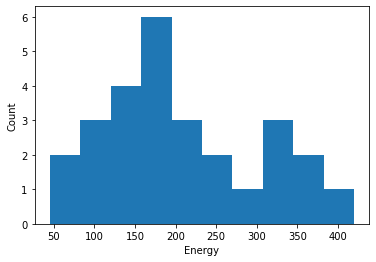

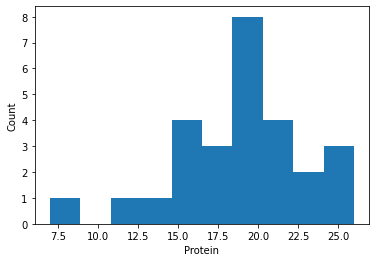

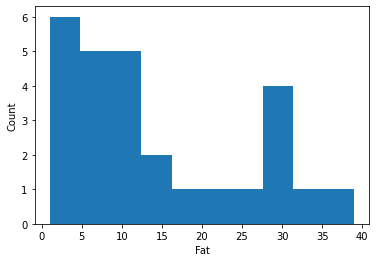

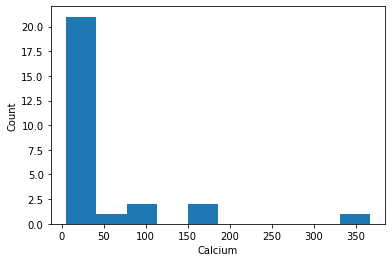

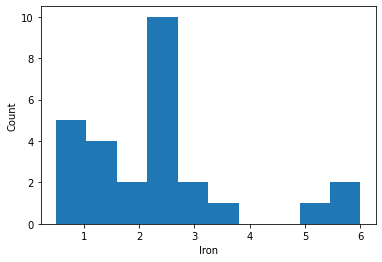

In [3]:
for i in range(1,6):
    plt.figure(figsize=(6,4))
    plt.hist(df.iloc[:,i].values)
    plt.xlabel(df.columns.values[i])
    plt.ylabel('Count')
    plt.show()

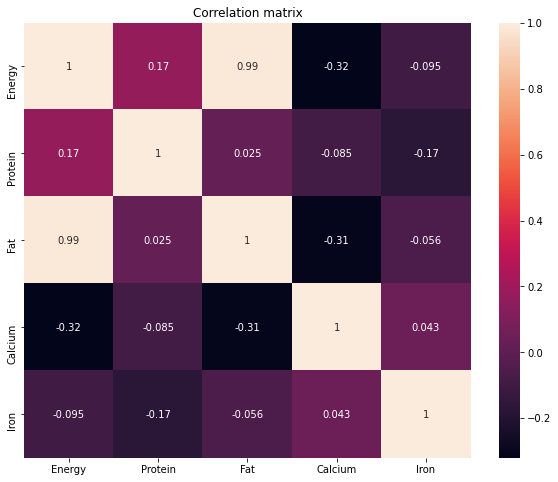

In [4]:
plt.figure(figsize=(10,8))
g = sns.heatmap(df.corr(), annot=True)
g.set(title='Correlation matrix')
plt.show()

In [5]:
df2 = df.copy()
df = normalize(df.iloc[:,1:])
df

array([[0.99454428, 0.0585026 , 0.08190365, 0.02632617, 0.00760534],
       [0.99325267, 0.08513594, 0.06891957, 0.03648683, 0.01094605],
       [0.99493947, 0.03553355, 0.09238724, 0.01658232, 0.00473781],
       [0.9948043 , 0.05040342, 0.08488997, 0.0238753 , 0.00689731],
       [0.98659111, 0.12058336, 0.05481062, 0.09317805, 0.02027993],
       [0.98251274, 0.17087178, 0.02563077, 0.06834871, 0.01196102],
       [0.98610394, 0.14501528, 0.04060428, 0.06960734, 0.00870092],
       [0.98228281, 0.15962096, 0.03069634, 0.08594975, 0.03622168],
       [0.99373848, 0.07499913, 0.07499913, 0.03374961, 0.00974989],
       [0.99429754, 0.05965785, 0.08285813, 0.02982893, 0.00762295],
       [0.99454645, 0.05850273, 0.08190383, 0.02632623, 0.00731284],
       [0.99446987, 0.05557332, 0.08482243, 0.0263242 , 0.00731228],
       [0.99469532, 0.05323721, 0.08405876, 0.02521763, 0.0067247 ],
       [0.99322533, 0.08721003, 0.06783002, 0.03391501, 0.0121125 ],
       [0.98995204, 0.12307512, 0.

In [6]:
c1,coph=cophenet(linkage(df, 'single'),pdist(df))
c2,coph=cophenet(linkage(df, 'complete'),pdist(df))
c3,coph=cophenet(linkage(df, 'average'),pdist(df))
c4,coph=cophenet(linkage(df, 'weighted'),pdist(df))
c5,coph=cophenet(linkage(df, 'centroid'),pdist(df))
linkage=pd.DataFrame({"Linkage":['Single','Complete','Average','Weighted','Centroid'],
                    "Cophenet Coeff":[c1,c2,c3,c4,c5]})
linkage

,Linkage,Cophenet Coeff
0,Single,0.959796
1,Complete,0.964865
2,Average,0.968280
3,Weighted,0.967990
4,Centroid,0.968274


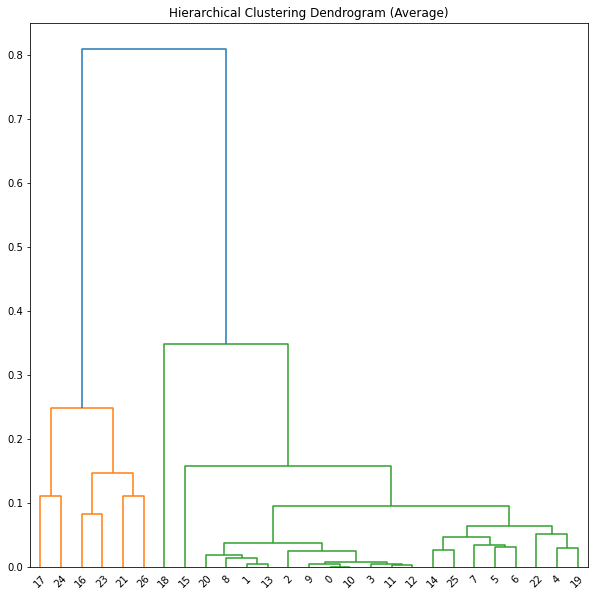

In [15]:
plt.figure(figsize=(10, 10))
dendrogram(linkage(df, 'average'))
plt.title('Hierarchical Clustering Dendrogram (Average)')
plt.show()

In [39]:
db_index=[]
for i in range(2,11):
    db_index.append(silhouette_score(df, AgglomerativeClustering(n_clusters=i,linkage='average').fit(df).labels_))
db_index = pd.DataFrame({'K Values':['2','3','4','5','6','7','8','9','10'],
                         'Silhouette index':db_index})
pd.DataFrame(db_index)

,K Values,Silhouette index
0,2,0.840039
1,3,0.702438
2,4,0.673562
3,5,0.472026
4,6,0.441687
5,7,0.415750
6,8,0.385742
7,9,0.418950
8,10,0.402763


In [40]:
from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=2)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

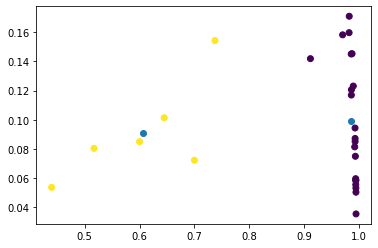

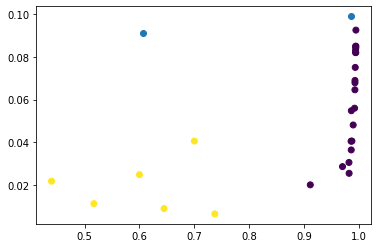

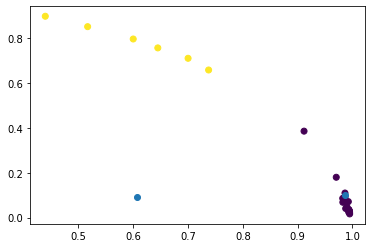

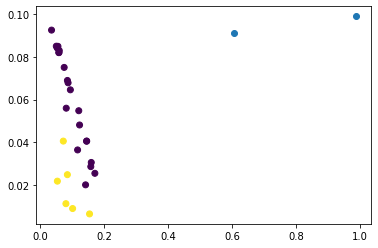

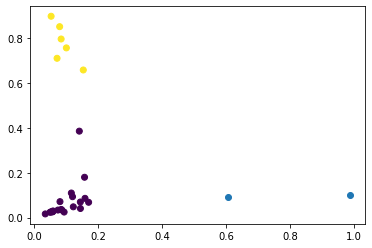

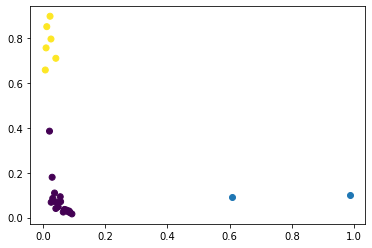

In [41]:
for i in range(4):
    for j in range(i+1, 4):
        plt.figure(figsize=(6, 4))
        plt.scatter(df[:, i], df[:, j], c=y_kmeans)

        centers = kmeans.cluster_centers_
        plt.scatter(centers[:, 0], centers[:, 1])
        plt.show()